In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
scaling = pd.read_csv('sec_README.dat', delim_whitespace=True)

In [3]:
scaling['nodes'] = scaling['MPI']//4

In [4]:
scaling['ideal'] = scaling['nodes']/5

In [5]:
#scaling.set_index('nodes', inplace=True)

In [6]:
#scaling.drop([5,10], inplace=True)

In [7]:
scaling['speedup'] = scaling.WALL_TIME.max() / scaling.WALL_TIME

In [8]:
scaling['efficiency'] = scaling.speedup / scaling.ideal * 100

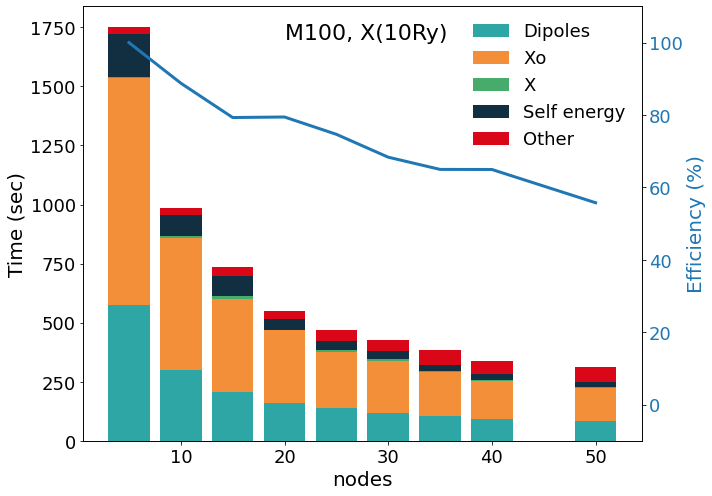

In [9]:
color1='#112F41'
color2='#2EA6A6'
color3='#47AB6C'
color4='#F28F38'
color5='#D90718'

residue=scaling['WALL_TIME']-scaling['dip']-scaling['Xo']-scaling['X']-scaling['Sgm_x']-scaling['Sgm_c']
sigma = scaling['Sgm_c']+scaling['Sgm_x']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('nodes',fontsize=20)
ax1.set_ylabel('Time (sec)',fontsize=20)
ax1.bar(scaling['nodes'],scaling['dip']  ,width=4,color=color2,label='Dipoles')
ax1.bar(scaling['nodes'],scaling['Xo']   ,width=4,color=color4,label='Xo', bottom=scaling['dip'])
ax1.bar(scaling['nodes'],scaling['X']    ,width=4,color=color3,label='X',bottom=scaling['dip']+scaling['Xo'] )
ax1.bar(scaling['nodes'],sigma           ,width=4,color=color1,label='Self energy',bottom=scaling['dip']+scaling['Xo']+scaling['X'])
ax1.bar(scaling['nodes'],residue         ,width=4,color=color5,label='Other',bottom=scaling['dip']+scaling['Xo']+scaling['X']+sigma)
#fig.xticks(scaling['nodes'])
ax1.legend( )
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax1.legend(fontsize='18',framealpha=0.0)
ax1.text(20, 1700, r'M100, X(10Ry)', fontsize=22)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([-10, 110])
ax2.set_ylabel('Efficiency (%)', color='tab:blue',fontsize=20)  # we already handled the x-label with ax1
ax2.plot(scaling['nodes'], scaling['efficiency'], linewidth=3, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=18)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Scaling - ecut=10Ry', fontsize=20)
plt.savefig('scaling.pdf')
plt.show()

In [10]:
scaling['node_h'] = scaling['nodes'] * scaling['WALL_TIME'] / 3600

In [11]:
scaling

ncores  MPI  threads       dip        Xo  Xo_REDUX       X  X_REDUX  \
0     160   20        8  576.6038  957.0000  351.0891  4.7830   4.5994   
1     320   40        8  299.9611  556.4200  232.0563  9.3613   9.1479   
2     480   60        8  207.5871  393.9697  169.0592  9.6609   9.4416   
3     640   80        8  160.9895  306.3268  131.2856  2.5007   2.3542   
4     800  100        8  137.3013  239.2997  103.0191  9.1440   9.1942   
5     960  120        8  118.8140  220.5923  100.7703  8.6329   8.7516   
6    1120  140        8  106.3719  185.3537   81.9791  3.3246   3.2998   
7    1280  160        8   93.7193  160.5194   67.6634  3.1809   3.1204   
8    1600  200        8   85.7031  139.7730   63.6865  3.0831   2.8891   

      io_X    io_WF    Sgm_x  (REDUX)     Sgm_c  (REDUX).1  WALL_TIME  nodes  \
0   3.1373  12.3918  14.8450   0.2901  166.9794    15.1224       1751      5   
1   1.2376   7.2857   8.1982   0.6745   81.2920     5.5305        986     10   
2  15.1501  24.6600   5.7833   4.5217   79.7920    13.7544        736     15   
3   1.2469   5.2042   4.3620   0.3088   41.8019     2.7776        551     20   
4   1.3765   4.5782   3.7741   0.4042   33.9519     2.5442        469     25   
5   1.1149   3.2316   3.3925   0.4983   28.1600     1.7705        427     30   
6   1.1343   3.2361   3.2977   0.8832   24.2758     0.8110        385     35   
7   1.6260   3.0669   3.0285   0.8608   21.5891     1.1128        337     40   
8   1.0724   3.2734   2.6406   0.6496   17.5087     1.1140        314     50   

   ideal   speedup  efficiency    node_h  
0    1.0  1.000000  100.000000  2.431944  
1    2.0  1.775862   88.793103  2.738889  
2    3.0  2.379076   79.302536  3.066667  
3    4.0  3.177858   79.446461  3.061111  
4    5.0  3.733475   74.669510  3.256944  
5    6.0  4.100703   68.345043  3.558333  
6    7.0  4.548052   64.972171  3.743056  
7    8.0  5.195846   64.948071  3.744444  
8   10.0  5.576433   55.764331  4.361111

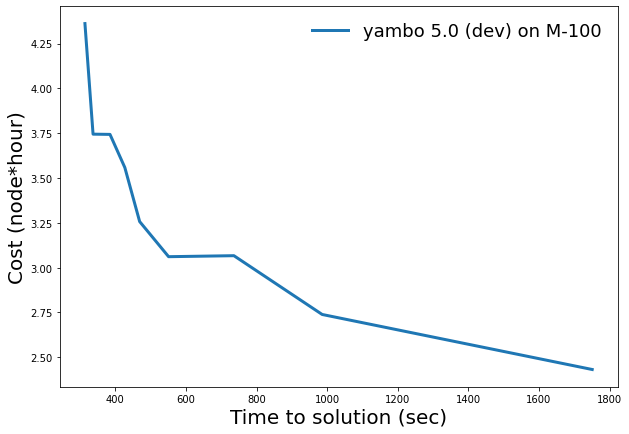

In [12]:
fig2, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlabel('Time to solution (sec)',fontsize=20)
ax3.set_ylabel('Cost (node*hour)',fontsize=20)
ax3.plot(scaling['WALL_TIME'], scaling['node_h'], linewidth=3, color='tab:blue', label='yambo 5.0 (dev) on M-100')
ax3.legend()
ax3.legend(fontsize='18',framealpha=0.0)

plt.savefig('cost.pdf')
plt.show()

In [13]:
scaling[['nodes', 'WALL_TIME', 'node_h']].to_csv('cost_y5.0_m100_10ry.csv')